# Import Libraries



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data



In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis



**  A histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**



In [15]:
df['credit.policy'].dtype

dtype('int64')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

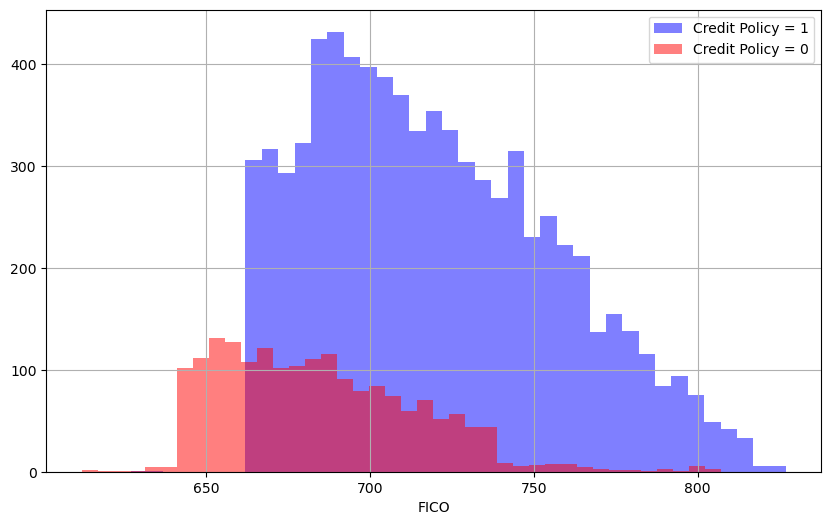

In [21]:
plt.figure(figsize=(10,6))

df[df["credit.policy"] == 1]["fico"].hist(bins=40, color="blue", alpha=0.5, label="Credit Policy = 1")
df[df["credit.policy"] == 0]["fico"].hist(bins=40, color="red", alpha=0.5, label="Credit Policy = 0")

plt.xlabel("FICO")
plt.legend()
plt.show()


** A similar figure, except this time select by the not.fully.paid column.**

<Figure size 1000x600 with 0 Axes>

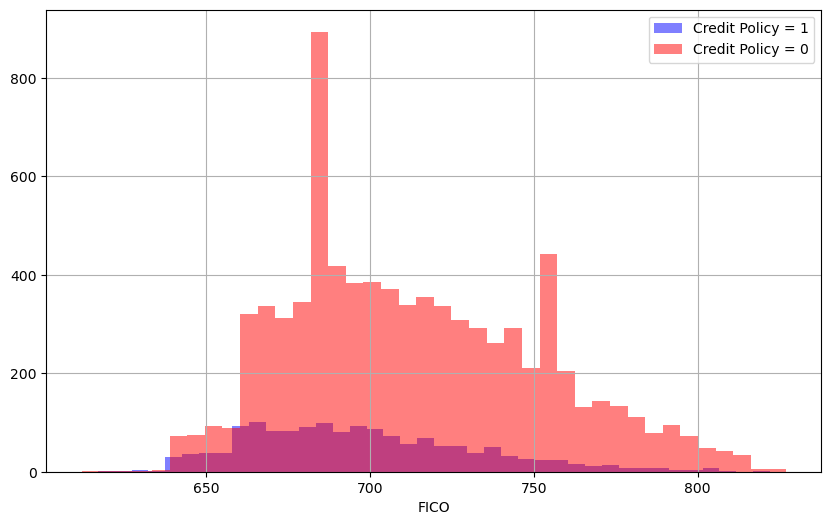

In [25]:
plt.figure(figsize=(10,6))

df[df["not.fully.paid"] == 1]["fico"].hist(bins=40, color="blue", alpha=0.5, label="Credit Policy = 1")
df[df["not.fully.paid"] == 0]["fico"].hist(bins=40, color="red", alpha=0.5, label="Credit Policy = 0")

plt.xlabel("FICO")
plt.legend()
plt.show()

**  A countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

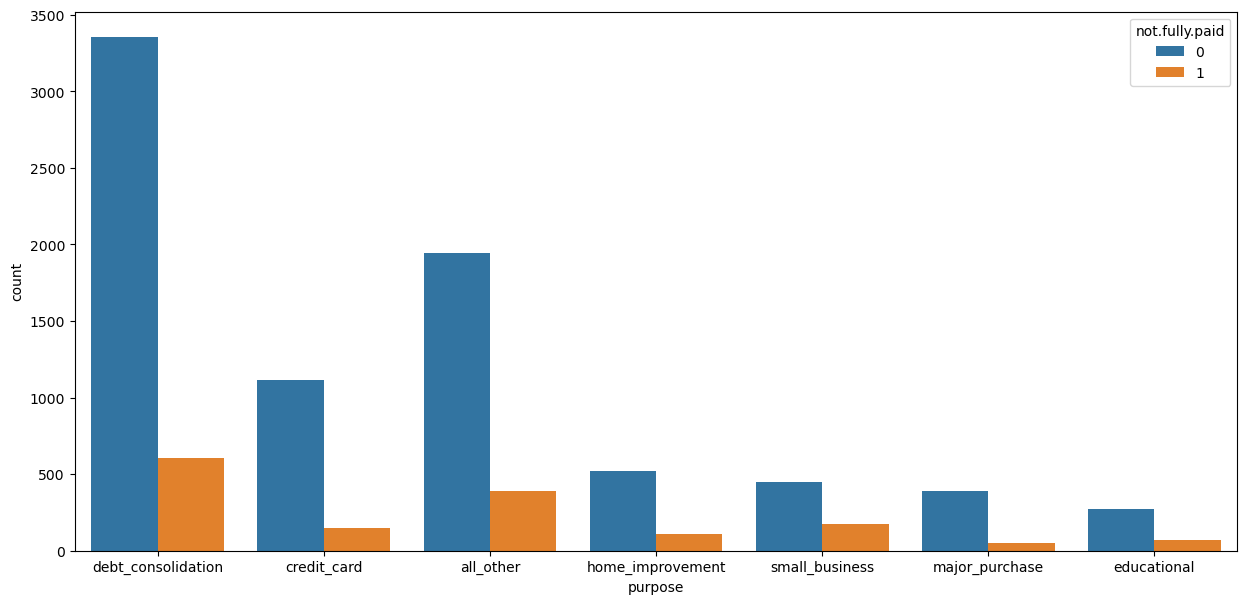

In [39]:
plt.figure(figsize=(15,7))

sns.countplot(data=df,x="purpose",hue="not.fully.paid")

plt.show()

** Let's see the trend between FICO score and interest rate.**

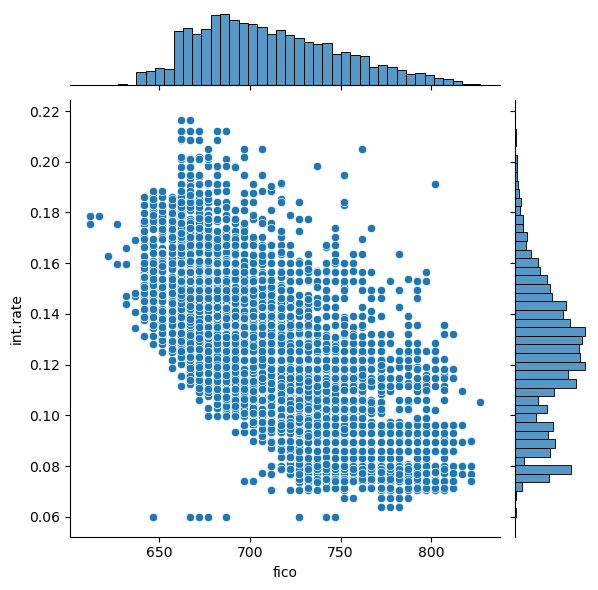

In [53]:
sns.jointplot(data=df,x="fico",y="int.rate",kind="scatter")
plt.show()

** lmplots to see if the trend differed between not.fully.paid and credit.policy.**

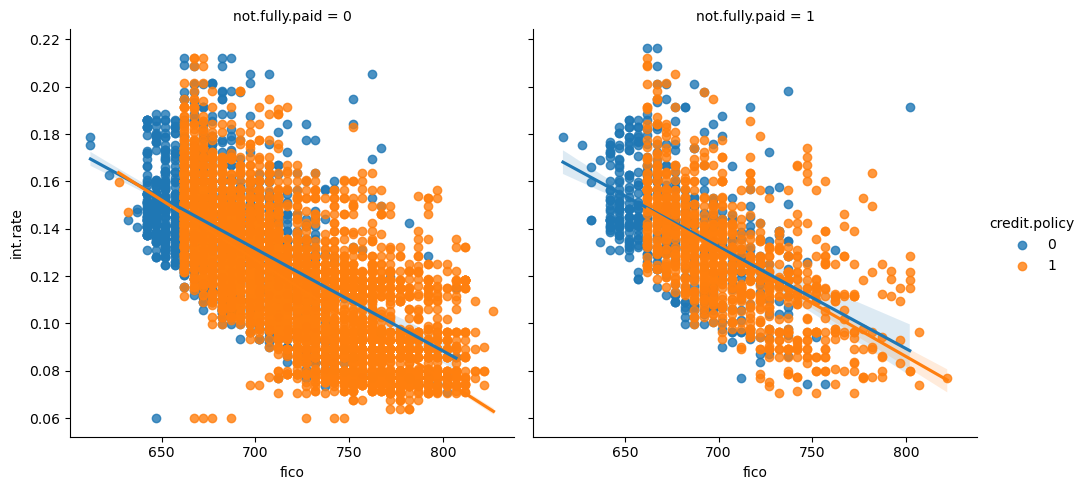

In [57]:
sns.lmplot(data=df,y="int.rate",x="fico",hue="credit.policy",col="not.fully.paid")
plt.show()

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them.

In [61]:
cat_feats=["purpose"]

**Now we use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [81]:
a=pd.get_dummies(df,columns=cat_feats,drop_first=True).astype(int)

In [83]:
final_data=pd.DataFrame(a)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,11,19,737,5639,28854,52,0,0,0,0,0,1,0,0,0,0
1,1,0,228,11,14,707,2760,33623,76,0,0,0,0,1,0,0,0,0,0
2,1,0,366,10,11,682,4710,3511,25,1,0,0,0,0,1,0,0,0,0
3,1,0,162,11,8,712,2699,33667,73,1,0,0,0,0,1,0,0,0,0
4,1,0,102,11,14,667,4066,4740,39,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,344,12,10,672,10474,215372,82,2,0,0,1,0,0,0,0,0,0
9574,0,0,257,11,0,722,4380,184,1,5,0,0,1,0,0,0,0,0,0
9575,0,0,97,10,13,687,3450,10036,82,8,0,0,1,0,1,0,0,0,0
9576,0,0,351,10,19,692,1800,0,3,5,0,0,1,0,0,0,1,0,0


## Train Test Split



In [75]:
from sklearn.model_selection import train_test_split

In [97]:
x=final_data.drop("not.fully.paid",axis=1)
y=final_data["not.fully.paid"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

## Training a Decision Tree Model


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4845,1,0,548,10,14,682,3959,9092,23,0,0,0,0,1,0,0,0,0
6910,1,0,312,10,0,772,5190,2232,6,0,0,0,0,0,0,0,0,0
8146,0,0,208,10,18,642,3270,6970,76,4,1,0,0,1,0,0,0,0
7113,1,0,511,10,12,682,3420,21113,72,2,0,0,0,0,0,0,0,0
195,1,0,130,11,17,682,6330,18168,68,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1,0,710,11,20,662,4110,26255,74,1,0,0,0,1,0,0,0,0
5695,1,0,164,10,22,662,2850,275,3,3,1,0,0,0,0,0,0,0
8006,0,0,531,10,20,652,2880,1728,57,8,0,0,0,1,0,0,0,0
1361,1,0,238,11,4,752,7626,8575,25,1,0,0,0,0,0,0,0,0


In [105]:
dtc=DecisionTreeClassifier()

In [107]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [109]:
pred=dtc.predict(x_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[2010  421]
 [ 345   98]]


## Training the Random Forest model

Now its time to train our model!



In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc= RandomForestClassifier(n_estimators=179)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=179)

## Predictions and Evaluation



In [119]:
pred=rfc.predict(x_test)

In [121]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.50      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874



[[2417   14]
 [ 429   14]]


**What performed better the random forest or the decision tree?**

In [36]:
Depends on the context of the question.